In [1]:
import platform, sys, os, shutil
import packaging.version as pv
import time

try:
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/drive/')
    print('Google Colab environment detected. Mounted Google Drive.')
except ImportError:
    print('This is not Google Colab.')

python_version=platform.python_version()
print('Python version:', python_version)

if pv.parse(python_version) < pv.parse("3.0.0"):
    print("Python3 is needed!")
    print("How to fix: Runtime/Change_runtime_type/Python 3")
    sys.exit()

try:
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy import __version__ as sp_version
    from scipy.optimize import fsolve
    import mpmath
    import openturns as ot
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime
    import re
    import csv
except ImportError as e:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-release-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    from dolfin import *
    from dolfin import __version__ as dolfin_version
    import mshr
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib import __version__ as mpl_version
    import pandas as pd
    from tqdm import tqdm
    import scipy.optimize as opt
    from scipy.stats import norm as sp_norm
    from scipy.integrate import quad
    from scipy.integrate import simpson
    from scipy.signal import find_peaks
    from scipy.optimize import fsolve
    from scipy import __version__ as sp_version
    import mpmath
    !pip install openturns
    import openturns as ot
    !pip install scikit-learn
    from sklearn.neighbors import KernelDensity
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score
    from tabulate import tabulate
    !pip install plotly
    !pip install kaleido
    import plotly.graph_objs as go
    import plotly.io as pio
    from datetime import datetime
    import re
    import csv

try:
    import gmsh
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/gmsh-install.sh" -O "/tmp/gmsh-install.sh" && bash "/tmp/gmsh-install.sh"
    import gmsh

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)
plt.rc('lines', linewidth=3)

from IPython.display import clear_output, display

import warnings
warnings.filterwarnings("ignore")

ot.Log.Show(ot.Log.NONE)

set_log_level(30)

parameters['allow_extrapolation'] = True
parameters["form_compiler"]["cpp_optimize"] = True
parameters["form_compiler"]["optimize"] = True
parameters["form_compiler"]["quadrature_degree"] = 3
parameters['form_compiler']['representation'] = 'uflacs'
parameters['linear_algebra_backend'] = "PETSc"

print('numpy version:', np.__version__)
print('scipy version:', sp_version)
print('matplotlib version:', mpl_version)
print('dolfin version:', dolfin_version)
print('gmsh version:', gmsh.__version__)
print('mpmath version:', mpmath.__version__)

try:
    from ILT import *
    from Functions_NMR import *
    from FEM_NMR import *
    from SemiA_Sphere_NMR import *
    from Conv_NMR import *
    from ND_FEM_NMR import *
    from pytwalk import pytwalk
except ImportError:
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ILT.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Functions_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/FEM_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/SemiA_Sphere_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/Conv_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/ND_FEM_NMR.py'
    !wget 'https://raw.githubusercontent.com/smoralesc91/NMR_FEM/main/Codes/pytwalk.py'
    from ILT import *
    from Functions_NMR import *
    from FEM_NMR import *
    from SemiA_Sphere_NMR import *
    from Conv_NMR import *
    from ND_FEM_NMR import *
    from pytwalk import pytwalk

print('ILT version:', ilt.__version__)
print('Functions_NMR version:', NMR_Functions.__version__)
print('FEM_NMR version:', NMR_FEM.__version__)
print('SemiA_Sphere_NMR version:', NMR_SemiA_sphere.__version__)
print('Conv_NMR version:', NMR_Conventional.__version__)
print('ND_FEM_NMR version:', ND_BT_FEM.__version__)

This is not Google Colab.
Python version: 3.12.3
numpy version: 1.26.4
scipy version: 1.11.4
matplotlib version: 3.6.3
dolfin version: 2019.2.0.64.dev0
gmsh version: 4.13.1
mpmath version: 1.2.1
ILT version: 1.0
Functions_NMR version: 1.0
FEM_NMR version: 1.5-spatial-profile
SemiA_Sphere_NMR version: 1.7-spatial-profile
Conv_NMR version: 1.0
ND_FEM_NMR version: 0.4_Rigorous_Analytic


Objetivo Adimensional: alpha = 0.1180
Corriendo t-walk (Inferring alpha & sigma)...
pytwalk: Running the twalk with 1000 iterations .  Thu, 04 Dec 2025, 08:40:09.
       Finish in approx. 3 min and 53 sec.
pytwalk:        256 iterations so far. Finish in approx. 2 min and 22 sec.
pytwalk: finished, Thu, 04 Dec 2025, 08:43:50.

=== RESULTADOS ===
Parámetro   | Real       | MAP Estimado
Alpha (ND)  | 0.1180     | 0.1231
Rho (Phys)  | 4.00e-06   | 4.18e-06
Sigma (Nse) | 0.0200     | 0.0154


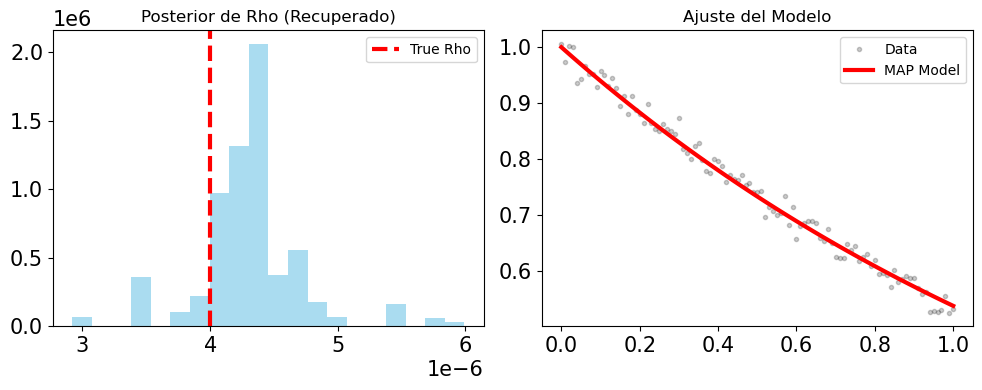

In [2]:
# Asumimos que ND_BT_FEM ya está importada
# from tu_script import ND_BT_FEM

# ==========================================
# 0. CONFIGURACIÓN FÍSICA (VERDAD DE REFERENCIA)
# ==========================================
# Parámetros Fijos (Fluid & Geometry Assumptions)
R_ref   = 100.0e-6    # [m]
D_ref   = 2.3e-9      # [m^2/s]
T2B_ref = 2.0         # [s]

# Parámetro a recuperar (Target)
rho_true = 4.0e-6     # [m/s]

# Cálculo de la Verdad Adimensional (Lo que el MCMC debe encontrar)
# alpha = rho * sqrt(T2B / D)
alpha_true = rho_true * np.sqrt(T2B_ref / D_ref)
print(f"Objetivo Adimensional: alpha = {alpha_true:.4f}")

# ==========================================
# 1. GENERACIÓN DE DATOS SINTÉTICOS
# ==========================================
# Generamos datos usando el modelo FEM
# Usamos volume_=False para ser consistentes con Eq. 52 del paper S(tau)
t_gen, s_gen = ND_BT_FEM(
    radius=R_ref, diffusion=D_ref, rho=rho_true, T2B=T2B_ref,
    t_0=0.0, t_f=1.0, dt=1e-2,
    mesh_res=300, 
    volume_=False,    # <--- CORREGIDO: Usar definición S(tau)
    normalize=True, 
    return_data='time-mag'
)

# Añadimos Ruido
SNR = 50 
sigma_true = 1.0 / SNR
rng = np.random.default_rng(42)
y_obs = s_gen + rng.normal(0, sigma_true, size=s_gen.shape)
t_obs = t_gen

# ==========================================
# 2. MODELO DIRECTO (WRAPPER)
# ==========================================
def forward_model_fem(alpha_candidate):
    """
    Recibe: alpha (adimensional)
    Calcula: rho (fisico) -> FEM -> Señal
    """
    # 1. Recuperación Determinista de Parámetro Físico (Sec. 8.5 del Paper)
    # rho = alpha * sqrt(D / T2B)
    rho_candidate = alpha_candidate * np.sqrt(D_ref / T2B_ref)
    
    # 2. Llamada al FEM
    try:
        _, s_sim = ND_BT_FEM(
            radius=R_ref, diffusion=D_ref, T2B=T2B_ref, # Fijos
            rho=rho_candidate,                          # Variable
            t_0=0.0, t_f=1.0, dt=1e-2,                  # Mismo grid
            mesh_res=100,                               # Malla más grosera para velocidad MCMC
            volume_=False, normalize=True,
            return_data='time-mag',
            progress=False
        )
        return s_sim
    except Exception:
        return np.full_like(t_obs, -10.0)

# ==========================================
# 3. DEFINICIÓN BAYESIANA (alpha, sigma)
# ==========================================

# Soporte (Hard Bounds)
def Supp(x):
    alpha_val, sigma_val = x
    # alpha entre [0.01, 10] (Priors del paper)
    # sigma entre [0.0001, 0.1]
    if not (1e-2 < alpha_val < 10.0): return False
    if not (1e-4 < sigma_val < 0.2):  return False
    return True

# Log-Prior (Uniforme según paper, solo verifica soporte)
def log_prior(x):
    if Supp(x): return 0.0
    return -np.inf

# Log-Likelihood (Gaussian con sigma variable)
def log_lik(x):
    alpha_val, sigma_val = x
    
    # Modelo
    s_pred = forward_model_fem(alpha_val)
    
    # Verificación de fallo numérico
    if np.any(s_pred == -10.0): return -np.inf
    
    # Log-Likelihood Gaussiana
    resid = y_obs - s_pred
    n = len(y_obs)
    # LogL = -N/2 log(2pi) - N log(sigma) - SSE/(2 sigma^2)
    return -n * np.log(sigma_val) - 0.5 * np.sum(resid**2) / sigma_val**2

# Energía (-LogPost)
def Energy(x):
    if not Supp(x): return np.inf
    return -(log_lik(x) + log_prior(x))

# ==========================================
# 4. EJECUCIÓN PYTWALK
# ==========================================
# Estado inicial: x = [alpha, sigma]
x0  = np.array([0.1, 0.05])
xp0 = np.array([0.5, 0.01])

print(f"Corriendo t-walk (Inferring alpha & sigma)...")
tw = pytwalk.pytwalk(n=2, U=Energy, Supp=Supp) # n=2 dimensiones

# Nota: 200 iteraciones es poco, pero FEM es lento.
# Para producción, usar NMR_SemiA_sphere_dimless en lugar de ND_BT_FEM dentro de forward_model
tw.Run(T=1000, x0=x0, xp0=xp0) 

# ==========================================
# 5. ANÁLISIS Y RECUPERACIÓN FÍSICA
# ==========================================
chain = tw.Output
alpha_chain = chain[:, 0]
sigma_chain = chain[:, 1]
U_chain = chain[:, -1]

# Burn-in
burn = 50
alpha_post = alpha_chain[burn:]
sigma_post = sigma_chain[burn:]

# MAP (Máximo a Posteriori) de alpha
idx_map = np.argmin(U_chain[burn:])
alpha_map = alpha_post[idx_map]
sigma_map = sigma_post[idx_map]

# --- RECUPERACIÓN DE RHO (Post-Proceso) ---
# rho = alpha * sqrt(D / T2B)
conv_factor = np.sqrt(D_ref / T2B_ref)
rho_map_phys = alpha_map * conv_factor
rho_post_phys = alpha_post * conv_factor

print("\n=== RESULTADOS ===")
print(f"Parámetro   | Real       | MAP Estimado")
print(f"Alpha (ND)  | {alpha_true:.4f}     | {alpha_map:.4f}")
print(f"Rho (Phys)  | {rho_true:.2e}   | {rho_map_phys:.2e}")
print(f"Sigma (Nse) | {sigma_true:.4f}     | {sigma_map:.4f}")

# Gráfico Rápido
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(rho_post_phys, bins=20, color='skyblue', density=True, alpha=0.7)
plt.axvline(rho_true, color='r', ls='--', label='True Rho')
plt.title("Posterior de Rho (Recuperado)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(t_obs, y_obs, 'k.', alpha=0.2, label='Data')
plt.plot(t_obs, forward_model_fem(alpha_map), 'r-', label='MAP Model')
plt.title("Ajuste del Modelo")
plt.legend()
plt.show()

In [ ]:
import json
import time

# --- IMPORTANTE: Asegúrate de tener estas funciones disponibles ---
# from ND_FEM_Module import ND_BT_FEM
# from Metrics_Module import compute_error_metrics

# Si están en el mismo script, no hace falta importar. 
# (Asumo que ND_BT_FEM y compute_error_metrics están definidas arriba)

# ==========================================
# 1. CONFIGURACIÓN GLOBAL
# ==========================================
D_REF   = 2.3e-9      # [m^2/s]
T2B_REF = 2.0         # [s]
SNR     = 50.0
SIGMA_TRUE = 1.0 / SNR

# Lista de Casos Solicitados
CASES = [
    {"id": "Caso1", "R": 2.25e-6,   "rho": 1.0e-6,  "tf": 10.0}, # Pequeño, Lento
    {"id": "Caso2", "R": 94.855e-6, "rho": 1.0e-6,  "tf": 10.0}, # Grande, Lento
    {"id": "Caso3", "R": 2.25e-6,   "rho": 40.0e-6, "tf": 10.0}, # Pequeño, Rápido
    {"id": "Caso4", "R": 94.855e-6, "rho": 1.0e-6,  "tf": 10.0}, # Grande, Lento (Repetido según prompt)
    # Nota: Si el Caso 4 debía ser rho=40e-6 (Grande/Rápido), cámbialo aquí.
]

OUTPUT_DIR = "Resultados_Bayesiano_FEM"

# ==========================================
# 2. FUNCIÓN NÚCLEO (CORRE UN SOLO CASO)
# ==========================================
def run_single_case(case_params):
    case_id = case_params["id"]
    R_true  = case_params["R"]
    rho_true = case_params["rho"]
    tf_val   = case_params["tf"]
    
    print(f"\n{'='*60}")
    print(f" PROCESANDO {case_id}: R={R_true*1e6:.2f}um, rho={rho_true*1e6:.1f}um/s")
    print(f"{'='*60}")

    # --- A. Generar Datos Sintéticos (Ground Truth) ---
    # Usamos malla fina (300) para la "Verdad"
    print("-> Generando datos sintéticos (FEM High-Res)...")
    t_gen, s_gen = ND_BT_FEM(
        radius=R_true, diffusion=D_REF, rho=rho_true, T2B=T2B_REF,
        t_0=0.0, t_f=tf_val, dt=1e-2, # dt ajustado
        mesh_res=300, 
        volume_=False, normalize=True, return_data='time-mag',
        linear_solver='mumps'
    )
    
    # Añadir Ruido
    rng = np.random.default_rng(42)
    y_obs = s_gen + rng.normal(0, SIGMA_TRUE, size=s_gen.shape)
    t_obs = t_gen

    # Valor verdadero de Alpha (Target)
    alpha_true = rho_true * np.sqrt(T2B_REF / D_REF)

    # --- B. Definir Modelo Inverso (Closure) ---
    
    def forward_fem_mcmc(alpha_cand):
        # Recuperar rho asumiendo D y T2B fijos
        rho_cand = alpha_cand * np.sqrt(D_REF / T2B_REF)
        
        try:
            # Usamos malla media (60-80) para velocidad en MCMC
            # Esto introduce un pequeño "error de modelado" realista
            _, s_out = ND_BT_FEM(
                radius=R_true, diffusion=D_REF, rho=rho_cand, T2B=T2B_REF,
                t_0=0.0, t_f=tf_val, dt=1e-2,
                mesh_res=60, # Optimización de velocidad
                volume_=False, normalize=True, return_data='time-mag',
                progress=False, linear_solver='mumps'
            )
            return s_out
        except:
            return np.full_like(t_obs, -10.0)

    def Supp(x):
        # x[0] = alpha, x[1] = sigma
        if not (1e-4 < x[0] < 20.0): return False # Rango amplio para alpha
        if not (1e-5 < x[1] < 0.2):  return False # Rango razonable para sigma
        return True

    def Energy(x):
        if not Supp(x): return np.inf
        alpha_val, sigma_val = x
        
        s_pred = forward_fem_mcmc(alpha_val)
        if np.any(s_pred == -10.0): return np.inf
        
        resid = y_obs - s_pred
        n = len(y_obs)
        log_lik = -n * np.log(sigma_val) - 0.5 * np.sum(resid**2) / sigma_val**2
        
        # Log-Prior plano (dentro del soporte)
        return -log_lik

    # --- C. Ejecutar pytwalk ---
    print("-> Iniciando MCMC (esto puede tardar unos minutos)...")
    # Puntos iniciales dispersos
    x0  = np.array([0.1, 0.05])
    xp0 = np.array([1.0, 0.01])
    
    tw = pytwalk.pytwalk(n=2, U=Energy, Supp=Supp)
    
    start_time = time.time()
    # 1500 iteraciones (ajustar según paciencia y CPU)
    # Con FEM, esto tomará aprox 2-5 minutos por caso
    tw.Run(T=1500, x0=x0, xp0=xp0) 
    elapsed = time.time() - start_time
    print(f"-> MCMC finalizado en {elapsed:.2f} s")

    # --- D. Análisis ---
    burn = 300
    chain = tw.Output
    alpha_post = chain[burn:, 0]
    sigma_post = chain[burn:, 1]
    U_post     = chain[burn:, -1]

    # MAP Estimator
    idx_map = np.argmin(U_post)
    alpha_map = alpha_post[idx_map]
    sigma_map = sigma_post[idx_map]
    
    # Recuperación Física
    rho_map = alpha_map * np.sqrt(D_REF / T2B_REF)
    
    # Predicción MAP para calcular error
    s_map = forward_fem_mcmc(alpha_map)

    # Métricas de Error (Obs vs MAP)
    metrics = compute_error_metrics(
        y_true=s_gen, # Comparamos contra la señal SIN ruido (Verdadera)
        y_pred=s_map,
        t=t_obs,
        relative="mape"
    )

    # --- E. Guardar Resultados ---
    case_dir = os.path.join(OUTPUT_DIR, case_id)
    os.makedirs(case_dir, exist_ok=True)

    # 1. JSON Report
    report = {
        "case_id": case_id,
        "inputs": {"R": R_true, "rho_true": rho_true, "tf": tf_val, "SNR": SNR},
        "recovered_map": {
            "alpha": alpha_map,
            "rho": rho_map,
            "sigma": sigma_map
        },
        "recovered_mean": {
            "rho": float(np.mean(alpha_post * np.sqrt(D_REF/T2B_REF))),
            "rho_std": float(np.std(alpha_post * np.sqrt(D_REF/T2B_REF)))
        },
        "errors": metrics,
        "mcmc_time_s": elapsed
    }
    with open(os.path.join(case_dir, "metrics.json"), 'w') as f:
        json.dump(report, f, indent=4)

    # 2. CSV Chain (Solo guardamos cada 5 pasos para ahorrar espacio si es muy largo)
    np.savetxt(os.path.join(case_dir, "chain.csv"), chain[::1, :], 
               header="alpha,sigma,energy,log_posterior", delimiter=",")

    # 3. Gráficas (Dashboard)
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    
    # Traceplot Rho
    rho_chain_phys = chain[:, 0] * np.sqrt(D_REF/T2B_REF)
    axs[0].plot(rho_chain_phys, alpha=0.7)
    axs[0].axhline(rho_true, color='r', ls='--', label='True')
    axs[0].set_title(f"{case_id}: Traceplot Rho")
    axs[0].set_ylabel("Rho [m/s]")
    axs[0].set_xlabel("Iteración")
    
    # Histograma Posterior
    axs[1].hist(rho_chain_phys[burn:], bins=25, density=True, color='skyblue', alpha=0.7)
    axs[1].axvline(rho_true, color='r', ls='--', lw=2, label='True')
    axs[1].axvline(rho_map, color='k', ls='-', label=f'MAP: {rho_map:.2e}')
    axs[1].set_title("Posterior Rho")
    axs[1].legend()
    
    # Ajuste Señal
    axs[2].plot(t_obs, y_obs, 'k.', alpha=0.1, label='Noisy Data')
    axs[2].plot(t_obs, s_map, 'r-', lw=2, label='MAP Model')
    axs[2].set_title(f"Fit (RMSE={metrics['RMSE']:.2e})")
    axs[2].legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(case_dir, "plot_dashboard.png"), dpi=150)
    plt.close() # Cerrar para liberar memoria
    
    print(f"-> Resultados guardados en {case_dir}")


# ==========================================
# 3. EJECUCIÓN PRINCIPAL
# ==========================================
if __name__ == "__main__":
    print("Iniciando Batería de Simulaciones Bayesianas (FEM)...")
    os.makedirs(OUTPUT_DIR, exist_ok=True)
    
    for case in CASES:
        run_single_case(case)
        
    print("\n\n=== TODOS LOS CASOS FINALIZADOS ===")

Iniciando Batería de Simulaciones Bayesianas (FEM)...

 PROCESANDO Caso1: R=2.25um, rho=1.0um/s
-> Generando datos sintéticos (FEM High-Res)...
-> Iniciando MCMC (esto puede tardar unos minutos)...
pytwalk: Running the twalk with 1500 iterations .  Thu, 04 Dec 2025, 11:40:13.
       Finish by Thu, 04 Dec 2025, 12:35.
pytwalk:         64 iterations so far. Finish by Thu, 04 Dec 2025, 11:59.
pytwalk:        256 iterations so far. Finish by Thu, 04 Dec 2025, 12:01.
pytwalk:        384 iterations so far. Finish by Thu, 04 Dec 2025, 12:06.
pytwalk:        512 iterations so far. Finish by Thu, 04 Dec 2025, 12:13.
pytwalk:        768 iterations so far. Finish by Thu, 04 Dec 2025, 12:20.
pytwalk: finished, Thu, 04 Dec 2025, 12:27:41.
-> MCMC finalizado en 2848.37 s
-> Resultados guardados en Resultados_Bayesiano_FEM/Caso1

 PROCESANDO Caso2: R=94.86um, rho=1.0um/s
-> Generando datos sintéticos (FEM High-Res)...
-> Iniciando MCMC (esto puede tardar unos minutos)...
pytwalk: Running the twalk wi